<a href="https://colab.research.google.com/github/miftaadiwira16/Total-Cases-Deaths-Recovered-of-Covid-19-in-Indonesia-Using-Python/blob/main/Total_Cases%2C_Deaths%2C_Recovered_of_Covid_19_in_Indonesia_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Total Cases, Deaths, Recovered of Covid-19 in Indonesia.

Created by Mifta Adiwira Jati Jaka.

The COVID-19 dataset in Indonesia was created to find out various factors that could be taken into consideration in decision making related to the level of stringency in each province in Indonesia.

In this contents, we want to know about:
  - Trend of total Covid-19 cases in Indonesia in 2021
  - Top 10 provinces in Indonesia for the most total Covid-19 cases.
  - Top 10 provinces in Indonesia for the most total deaths due to Covid-19 cases.
  - Top 10 provinces in Indonesia for the most total recovered due to Covid-19 cases

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving covid_19_indonesia_time_series_all.csv to covid_19_indonesia_time_series_all.csv
User uploaded file "covid_19_indonesia_time_series_all.csv" with length 5098251 bytes


In [3]:
# import library
import io
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [4]:
# import dataset
data = pd.read_csv(io.BytesIO(uploaded['covid_19_indonesia_time_series_all.csv']))
data.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%,1.0,1.0


In [7]:
# information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21759 entries, 0 to 21758
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         21759 non-null  object 
 1   Location ISO Code            21759 non-null  object 
 2   Location                     21759 non-null  object 
 3   New Cases                    21759 non-null  int64  
 4   New Deaths                   21759 non-null  int64  
 5   New Recovered                21759 non-null  int64  
 6   New Active Cases             21759 non-null  int64  
 7   Total Cases                  21759 non-null  int64  
 8   Total Deaths                 21759 non-null  int64  
 9   Total Recovered              21759 non-null  int64  
 10  Total Active Cases           21759 non-null  int64  
 11  Location Level               21759 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [8]:
# drop columns that are not needed and there are missing values
data_v1 = data.drop(['City or Regency','Province','Island','Time Zone','Special Status',
                'Total Cities','Total Urban Villages','Total Rural Villages',
                'Growth Factor of New Cases','Growth Factor of New Deaths'],axis = 1)
data_v1 = data_v1.fillna(0)
data_v1.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Population Density,Longitude,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,41,...,16334.31,106.836118,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,105.13%
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,41,...,16334.31,106.836118,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,100.00%
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,138.34,113.921327,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%
3,3/2/2020,ID-RI,Riau,1,0,0,1,2,0,3,...,69.80,101.805109,0.511648,0.16,0.33,0.0,0.00,0.00,0.00%,150.00%
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,41,...,16334.31,106.836118,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,95.35%


In [11]:
# Check missing value
data_v1.isna().sum()

Date                        0
Location ISO Code           0
Location                    0
New Cases                   0
New Deaths                  0
New Recovered               0
New Active Cases            0
Total Cases                 0
Total Deaths                0
Total Recovered             0
Total Active Cases          0
Location Level              0
Country                     0
Continent                   0
Total Regencies             0
Total Districts             0
Area (km2)                  0
Population                  0
Population Density          0
Longitude                   0
Latitude                    0
New Cases per Million       0
Total Cases per Million     0
New Deaths per Million      0
Total Deaths per Million    0
Total Deaths per 100rb      0
Case Fatality Rate          0
Case Recovered Rate         0
dtype: int64

### Data Cleansing

In [12]:
# Change the column Location datatype from object to string
data_v1['Location'] = data_v1['Location'].astype('str')

In [13]:
# Change the column Date datatype from object to datetime
data_v1['Date'] = pd.to_datetime(data_v1['Date'])

In [14]:
# Drop row in the location column that contains the word 'Indonesia'
data_v1 = data_v1[data_v1["Location"].str.contains("Indonesia") == False]

### Data Visualization

- Trend of total Covid-19 cases in Indonesia in 2021

In [16]:
# Find out the earliest date
data_v1['Date'].min()

Timestamp('2020-03-01 00:00:00')

In [17]:
# Find out the latest date
data_v1['Date'].max()

Timestamp('2021-12-02 00:00:00')

In [20]:
# Filter date for year 2021
data_v1 = data_v1[(data_v1['Date'] > "2021-01-01") & (data_v1['Date'] < "2021-12-31")]

In [21]:
# Create a variable that has the format dd - yy (Month - Year)
data_v1['month_year'] = data_v1['Date'].apply(lambda x: x.strftime('%m-%Y'))
data_v1['month_year']

10053    01-2021
10054    01-2021
10055    01-2021
10056    01-2021
10057    01-2021
          ...   
21753    12-2021
21754    12-2021
21755    12-2021
21756    12-2021
21757    12-2021
Name: month_year, Length: 11370, dtype: object

In [22]:
# Do groupby variable month_year with the average in the column total cases
data_v1_trend = data_v1.groupby('month_year').sum()['Total Cases'].reset_index()
data_v1_trend

,month_year,Total Cases
0,01-2021,27306189
1,02-2021,34299981
2,03-2021,44414501
3,04-2021,47822000
4,05-2021,54133644
5,06-2021,58907140
6,07-2021,86177809
7,08-2021,118743972
8,09-2021,125166857
9,10-2021,131208239


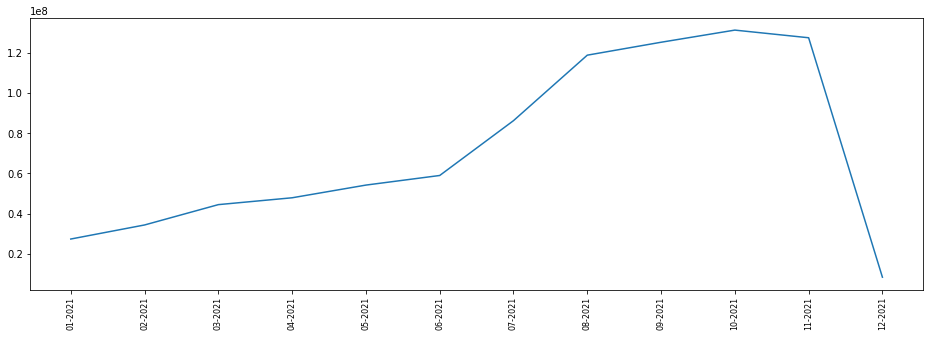

In [23]:
# Showing the trend of total Covid-19 cases in Indonesia in 2021
plt.figure(figsize=(16, 5))
plt.plot(data_v1_trend['month_year'], data_v1_trend['Total Cases'])
plt.xticks(rotation='vertical', size=8)
plt.show()

Based on graphic information on the trend of the total trend of Covid-19 cases in Indonesia in 2021, it is known that from January to June there was a not too sharp increase in total cases. From June to August, there was a significant increase. In August to October, not too sharp increase. From October to November, the total number of Covid-19 cases finally has not too sharp decline. And in the end, from November to December the total number of Covid-19 cases has a very sharp decline.


- Top 10 provinces in Indonesia for the most total Covid-19 cases.

In [24]:
# Creating the top_10_cases variable for the Top 10 provinces in Indonesia for the most total Covid-19 cases
top_10_cases = pd.DataFrame(data_v1.groupby('Location').sum()['Total Cases'])
top_10_cases.head()

,Total Cases
Location,
Aceh,7065812
Bali,22104878
Banten,25512287
Bengkulu,4284996
DKI Jakarta,193425457


In [26]:
# Sorting the variable top_10_cases
top_10_cases.sort_values(by=['Total Cases'], inplace=True, ascending=False)
top_10_cases[:10]

,Total Cases
Location,
DKI Jakarta,193425457
Jawa Barat,144696507
Jawa Tengah,98465979
Jawa Timur,79398392
Kalimantan Timur,32428885
Daerah Istimewa Yogyakarta,27495878
Banten,25512287
Sulawesi Selatan,25457968
Riau,25362480


<Figure size 864x864 with 0 Axes>

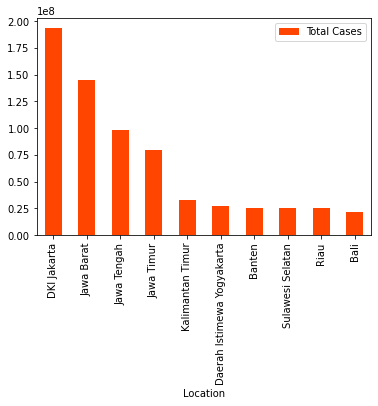

In [30]:
# Visualize top 10 provinces in Indonesia for the most total Covid-19 cases
plt.figure(figsize=(12, 12))
top_10_cases[:10].plot(kind='bar', color='orangered')

Based on the graphic information above, DKI Jakarta is ranked 1st with the most total COVID-19 cases in Indonesia. West Java, Central Java, and East Java were ranked 2nd, 3rd, and 4th for the most total COVID-19 cases in Indonesia. Ranks 5 to 10 are occupied by the provinces of East Kalimantan, Yogyakarta, Banten, South Sulawesi, Riau, Bali.


- Top 10 provinces in Indonesia for the most total deaths due to Covid-19 cases.

In [28]:
# Creating the top_10_deaths variable for the Top 10 provinces in Indonesia for the most total deaths due to Covid-19 cases
top_10_deaths = pd.DataFrame(data_v1.groupby('Location').sum()['Total Deaths'])
top_10_deaths.head()

,Total Deaths
Location,
Aceh,328268
Bali,708582
Banten,555388
Bengkulu,89267
DKI Jakarta,3052073


In [29]:
# Sorting the variable top_10_deaths
top_10_deaths.sort_values('Total Deaths', inplace=True, ascending=False)
top_10_deaths[:10]

,Total Deaths
Location,
Jawa Timur,5779546
Jawa Tengah,5351642
DKI Jakarta,3052073
Jawa Barat,2530110
Kalimantan Timur,968202
Daerah Istimewa Yogyakarta,838333
Riau,731959
Bali,708582
Lampung,616702


<Figure size 864x864 with 0 Axes>

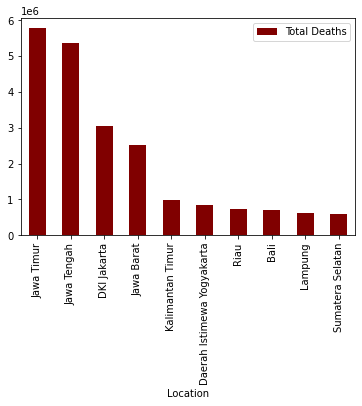

In [36]:
# Visualize top 10 provinces in Indonesia for the most total deaths due to Covid-19 cases.
plt.figure(figsize=(12, 12))
top_10_deaths[:10].plot(kind='bar',color='maroon')

Based on the graphic information above, East Java is ranked 1st for the total number of deaths due to COVID-19 cases by province in Indonesia. Central Java, DKI Jakarta, and West Java were ranked 2nd, 3rd, and 4th for the total number of deaths due to COVID-19 cases by province in Indonesia. Ranks 5 to 10 are occupied by the provinces of East Kalimantan, Yogyakarta, Riau, Bali, Lampung, South Sumatra.

- Top 10 provinces in Indonesia for the most total recovered due to Covid-19 cases

In [33]:
# Creating the top_10_recovered variable for the Top 10 provinces in Indonesia for the most total recovered due to Covid-19 cases
top_10_recovered = pd.DataFrame(data_v1.groupby('Location').sum()['Total Recovered'])
top_10_recovered.head()

,Total Recovered
Location,
Aceh,5950455
Bali,20404151
Banten,23507668
Bengkulu,3900923
DKI Jakarta,184773098


In [34]:
# Sorting the variable top_10_recovered
top_10_recovered.sort_values('Total Recovered', inplace=True, ascending=False)
top_10_recovered[:10]

,Total Recovered
Location,
DKI Jakarta,184773098
Jawa Barat,131968294
Jawa Tengah,84688700
Jawa Timur,70707631
Kalimantan Timur,29766025
Daerah Istimewa Yogyakarta,24083686
Sulawesi Selatan,23985656
Banten,23507668
Riau,23505730


<Figure size 864x864 with 0 Axes>

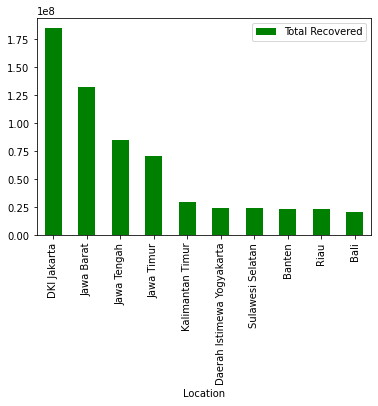

In [35]:
# Visualize top 10 provinces in Indonesia for the most total recovered due to Covid-19 cases.
plt.figure(figsize=(12, 12))
top_10_recovered[:10].plot(kind='bar',color='green')

Based on the graphic information above, DKI Jakarta is ranked 1st for total recovered due to COVID-19 cases by province in Indonesia. West Java, Central Java, and East Java were ranked 2nd, 3rd, and 4th for the total recovered due to COVID-19 cases by province in Indonesia. Ranks 5 to 10 are occupied by the provinces of East Kalimantan, Yogyakarta, South Sulawesi, Banten, Riau, Bali.